# Objective
The project seeks to determine whether the 2024 U.S. presidential election had a measurable and statistically significant impact on Tesla's stock price. It specifically aims to:

1. Quantify changes in Tesla's stock performance before and after the election.
2. Isolate the election's effect from other market influences, such as general stock market trends, using comparative ETFs.

The analysis is grounded in the premise that financial markets often experience instability before an election is settled, followed by potential increases in stability and stock performance after the announcement of a new president.

#### Null Hypothesis:
- $ H_0 : \text{Observed stock price} = \text{Predicted stock price (no intervention)} $
- The 2024 U.S. presidential election had no significant impact on Tesla's stock price.
- Any observed changes in Tesla's stock price after the election can be attributed to normal market fluctuations or other unrelated factors.

#### Alternative Hypothesis:
- $H_A: \text{Observed stock price} \neq \text{Predicted stock price (no intervention)}$
- The 2024 U.S. presidential election caused a **significant impact** on Tesla's stock price.




In [3]:
import yfinance as yf
import pandas as pd
from causalimpact import CausalImpact

# Define dates
training_start = "2023-11-01"
training_end = "2024-11-04"
treatment_start = "2024-11-05"
treatment_end = "2024-12-20"

# Define the stocks and ETF tickers
tesla_ticker = "TSLA"
etf_tickers = ["XLV", "MSFT", "AAPL", "NVDA", "XOM", "USO", "DIA", "IWM", "XLF"]  
all_tickers = [tesla_ticker] + etf_tickers
all_tickers


['TSLA', 'XLV', 'MSFT', 'AAPL', 'NVDA', 'XOM', 'USO', 'DIA', 'IWM', 'XLF']

In [4]:
# Download data for all tickers
data = yf.download(all_tickers,
                   start=training_start,
                   end=treatment_end,
                   interval="1d")

# Extract the closing prices
data_close = data["Close"]
data_close


[*********************100%***********************]  10 of 10 completed


Ticker,AAPL,DIA,IWM,MSFT,NVDA,TSLA,USO,XLF,XLV,XOM
Date,,,,,,,,,,
2023-11-01,172.894089,324.954926,162.938873,343.491760,42.309288,205.660004,74.750000,31.908348,122.301559,102.061478
2023-11-02,176.471832,330.532349,167.281662,345.724976,43.489845,218.509995,76.180000,32.662704,124.241920,105.413933
2023-11-03,175.557495,332.700745,171.831268,350.171570,44.988289,219.960007,74.849998,33.093769,124.859299,104.128983
2023-11-06,178.121567,333.120819,169.684479,353.873810,45.734013,219.270004,74.910004,32.995796,125.692284,102.283684
2023-11-07,180.695557,333.609192,169.083786,357.844025,45.937939,222.179993,71.800003,32.946815,125.780487,100.679916
...,...,...,...,...,...,...,...,...,...,...
2024-12-13,248.130005,438.104248,232.380066,447.269989,134.250000,436.230011,74.209999,49.329628,140.354523,110.839996
2024-12-16,251.039993,437.107147,233.746002,451.589996,132.000000,463.019989,73.699997,49.240009,138.682098,108.470001
2024-12-17,253.479996,434.315216,231.070007,454.459991,130.389999,479.859985,73.300003,48.891495,138.582550,108.010002


In [5]:
# Separate Tesla data (response variable) and covariates (predictors)
y = data_close[tesla_ticker].rename("Tesla")
X = data_close[etf_tickers]
X

Ticker,XLV,MSFT,AAPL,NVDA,XOM,USO,DIA,IWM,XLF
Date,,,,,,,,,
2023-11-01,122.301559,343.491760,172.894089,42.309288,102.061478,74.750000,324.954926,162.938873,31.908348
2023-11-02,124.241920,345.724976,176.471832,43.489845,105.413933,76.180000,330.532349,167.281662,32.662704
2023-11-03,124.859299,350.171570,175.557495,44.988289,104.128983,74.849998,332.700745,171.831268,33.093769
2023-11-06,125.692284,353.873810,178.121567,45.734013,102.283684,74.910004,333.120819,169.684479,32.995796
2023-11-07,125.780487,357.844025,180.695557,45.937939,100.679916,71.800003,333.609192,169.083786,32.946815
...,...,...,...,...,...,...,...,...,...
2024-12-13,140.354523,447.269989,248.130005,134.250000,110.839996,74.209999,438.104248,232.380066,49.329628
2024-12-16,138.682098,451.589996,251.039993,132.000000,108.470001,73.699997,437.107147,233.746002,49.240009
2024-12-17,138.582550,454.459991,253.479996,130.389999,108.010002,73.300003,434.315216,231.070007,48.891495


In [6]:
# Check for missing values and drop them if any
dataset = pd.concat([y, X], axis=1).dropna()
dataset

,Tesla,XLV,MSFT,AAPL,NVDA,XOM,USO,DIA,IWM,XLF
Date,,,,,,,,,,
2023-11-01,205.660004,122.301559,343.491760,172.894089,42.309288,102.061478,74.750000,324.954926,162.938873,31.908348
2023-11-02,218.509995,124.241920,345.724976,176.471832,43.489845,105.413933,76.180000,330.532349,167.281662,32.662704
2023-11-03,219.960007,124.859299,350.171570,175.557495,44.988289,104.128983,74.849998,332.700745,171.831268,33.093769
2023-11-06,219.270004,125.692284,353.873810,178.121567,45.734013,102.283684,74.910004,333.120819,169.684479,32.995796
2023-11-07,222.179993,125.780487,357.844025,180.695557,45.937939,100.679916,71.800003,333.609192,169.083786,32.946815
...,...,...,...,...,...,...,...,...,...,...
2024-12-13,436.230011,140.354523,447.269989,248.130005,134.250000,110.839996,74.209999,438.104248,232.380066,49.329628
2024-12-16,463.019989,138.682098,451.589996,251.039993,132.000000,108.470001,73.699997,437.107147,233.746002,49.240009
2024-12-17,479.859985,138.582550,454.459991,253.479996,130.389999,108.010002,73.300003,434.315216,231.070007,48.891495


In [7]:
# Display the first few rows of the dataset
print("Dataset sample:")
print(dataset.head())

Dataset sample:
                 Tesla         XLV        MSFT        AAPL       NVDA  \
Date                                                                    
2023-11-01  205.660004  122.301559  343.491760  172.894089  42.309288   
2023-11-02  218.509995  124.241920  345.724976  176.471832  43.489845   
2023-11-03  219.960007  124.859299  350.171570  175.557495  44.988289   
2023-11-06  219.270004  125.692284  353.873810  178.121567  45.734013   
2023-11-07  222.179993  125.780487  357.844025  180.695557  45.937939   

                   XOM        USO         DIA         IWM        XLF  
Date                                                                  
2023-11-01  102.061478  74.750000  324.954926  162.938873  31.908348  
2023-11-02  105.413933  76.180000  330.532349  167.281662  32.662704  
2023-11-03  104.128983  74.849998  332.700745  171.831268  33.093769  
2023-11-06  102.283684  74.910004  333.120819  169.684479  32.995796  
2023-11-07  100.679916  71.800003  333.609192 

In [8]:
# Compute the correlation matrix for the pre-intervention period
dataset_correlation = dataset.loc[:training_end].pct_change().dropna()
correlation_matrix = dataset_correlation.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          Tesla       XLV      MSFT      AAPL      NVDA       XOM       USO  \
Tesla  1.000000  0.086167  0.263968  0.363739  0.245877  0.020287  0.015200   
XLV    0.086167  1.000000  0.275307  0.178877  0.100208  0.131200 -0.144890   
MSFT   0.263968  0.275307  1.000000  0.469605  0.471456 -0.147770 -0.058886   
AAPL   0.363739  0.178877  0.469605  1.000000  0.287579 -0.031063 -0.019457   
NVDA   0.245877  0.100208  0.471456  0.287579  1.000000 -0.114296  0.093201   
XOM    0.020287  0.131200 -0.147770 -0.031063 -0.114296  1.000000  0.575580   
USO    0.015200 -0.144890 -0.058886 -0.019457  0.093201  0.575580  1.000000   
DIA    0.293088  0.692978  0.491199  0.380276  0.249586  0.309825  0.041978   
IWM    0.341831  0.496963  0.301839  0.322920  0.256277  0.280188  0.098619   
XLF    0.237265  0.586416  0.301224  0.201558  0.106148  0.349482  0.015378   

            DIA       IWM       XLF  
Tesla  0.293088  0.341831  0.237265  
XLV    0.692978  0.496963  0.5864

In [9]:
# Check the available end date
actual_end_date = dataset.index.max().strftime('%Y-%m-%d')
print("Actual end date in dataset:", actual_end_date)

# Adjust treatment_end if needed
if treatment_end > actual_end_date:
    treatment_end = actual_end_date

# Update post_period
post_period = [treatment_start, treatment_end]


Actual end date in dataset: 2024-12-19


In [10]:
pre_period = [training_start, training_end]
post_period = [treatment_start, treatment_end]


Instructions for updating:
Please use `StructuralTimeSeries.joint_distribution(observed_time_series).log_prob`

Instructions for updating:
`Predictive distributions returned by`tfp.sts.one_step_predictive` will soon compute per-timestep probabilities (treating timesteps as part of the batch shape) instead of a single probability for an entire series (the current approach, in which timesteps are treated as event shape). Please update your code to pass `timesteps_are_event_shape=False` (this will soon be the default) and to explicitly sum over the per-timestep log probabilities if this is required.

Causal Impact Summary:
Posterior Inference {Causal Impact}
                          Average            Cumulative
Actual                    362.09             11586.78
Prediction (s.d.)         256.56 (14.59)     8210.05 (466.83)
95% CI                    [228.88, 286.06]   [7324.14, 9154.07]

Absolute effect (s.d.)    105.52 (14.59)     3376.73 (466.83)
95% CI                    [76.02, 133

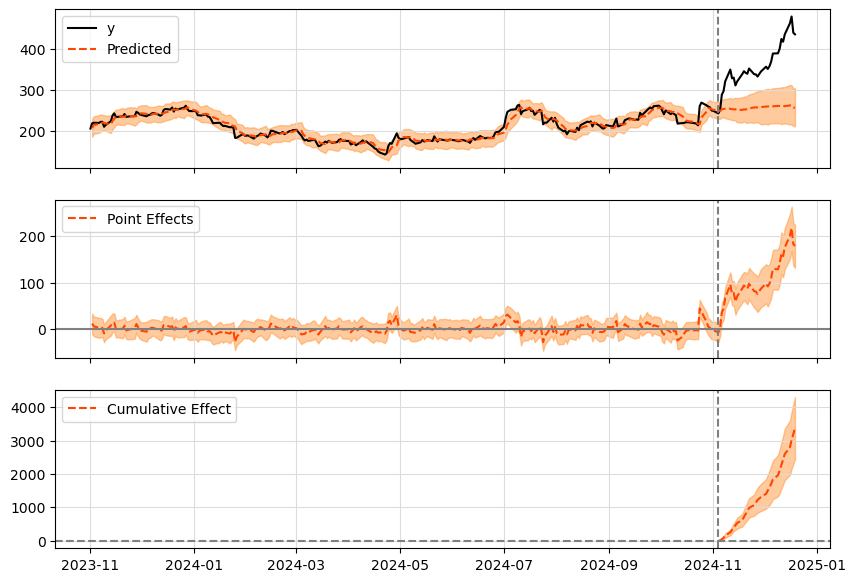

In [11]:
# Perform Causal Impact analysis
impact = CausalImpact(data=dataset, pre_period=pre_period, post_period=post_period)

# Display results
print("\nCausal Impact Summary:")
print(impact.summary())
print("\nDetailed Summary:")
print(impact.summary_data)
impact.plot()


- The p-value is 0.0, rejecting null hypothesis, indicating the effect is statistically significant.
- The Posterior probability of a causal effect is 100.0%, providing strong evidence that the observed change in Tesla’s stock price is causally linked to the election.